## Renege Prediction : 

#### Q.1 - 
*What are the various activities performed in the analytics project life cycle & 
What data challenges are faced while executing an analytics project:*

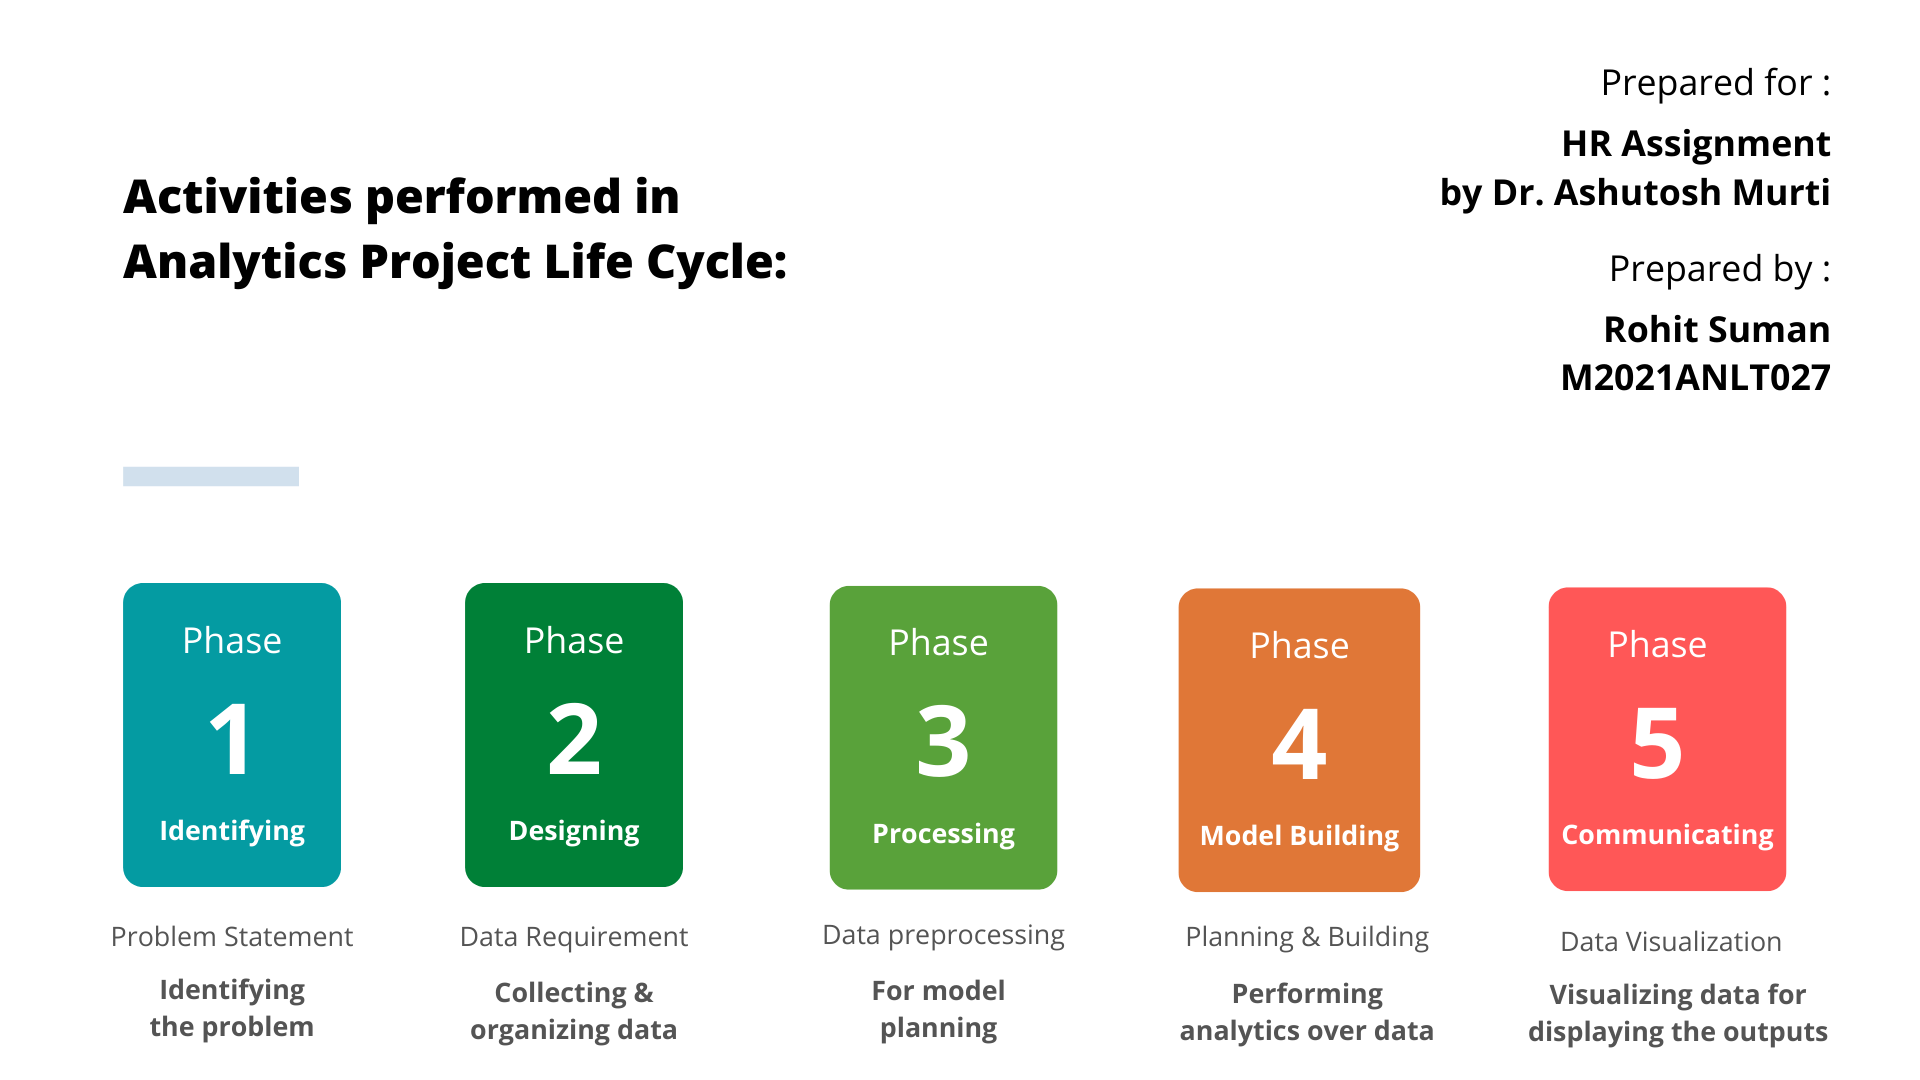

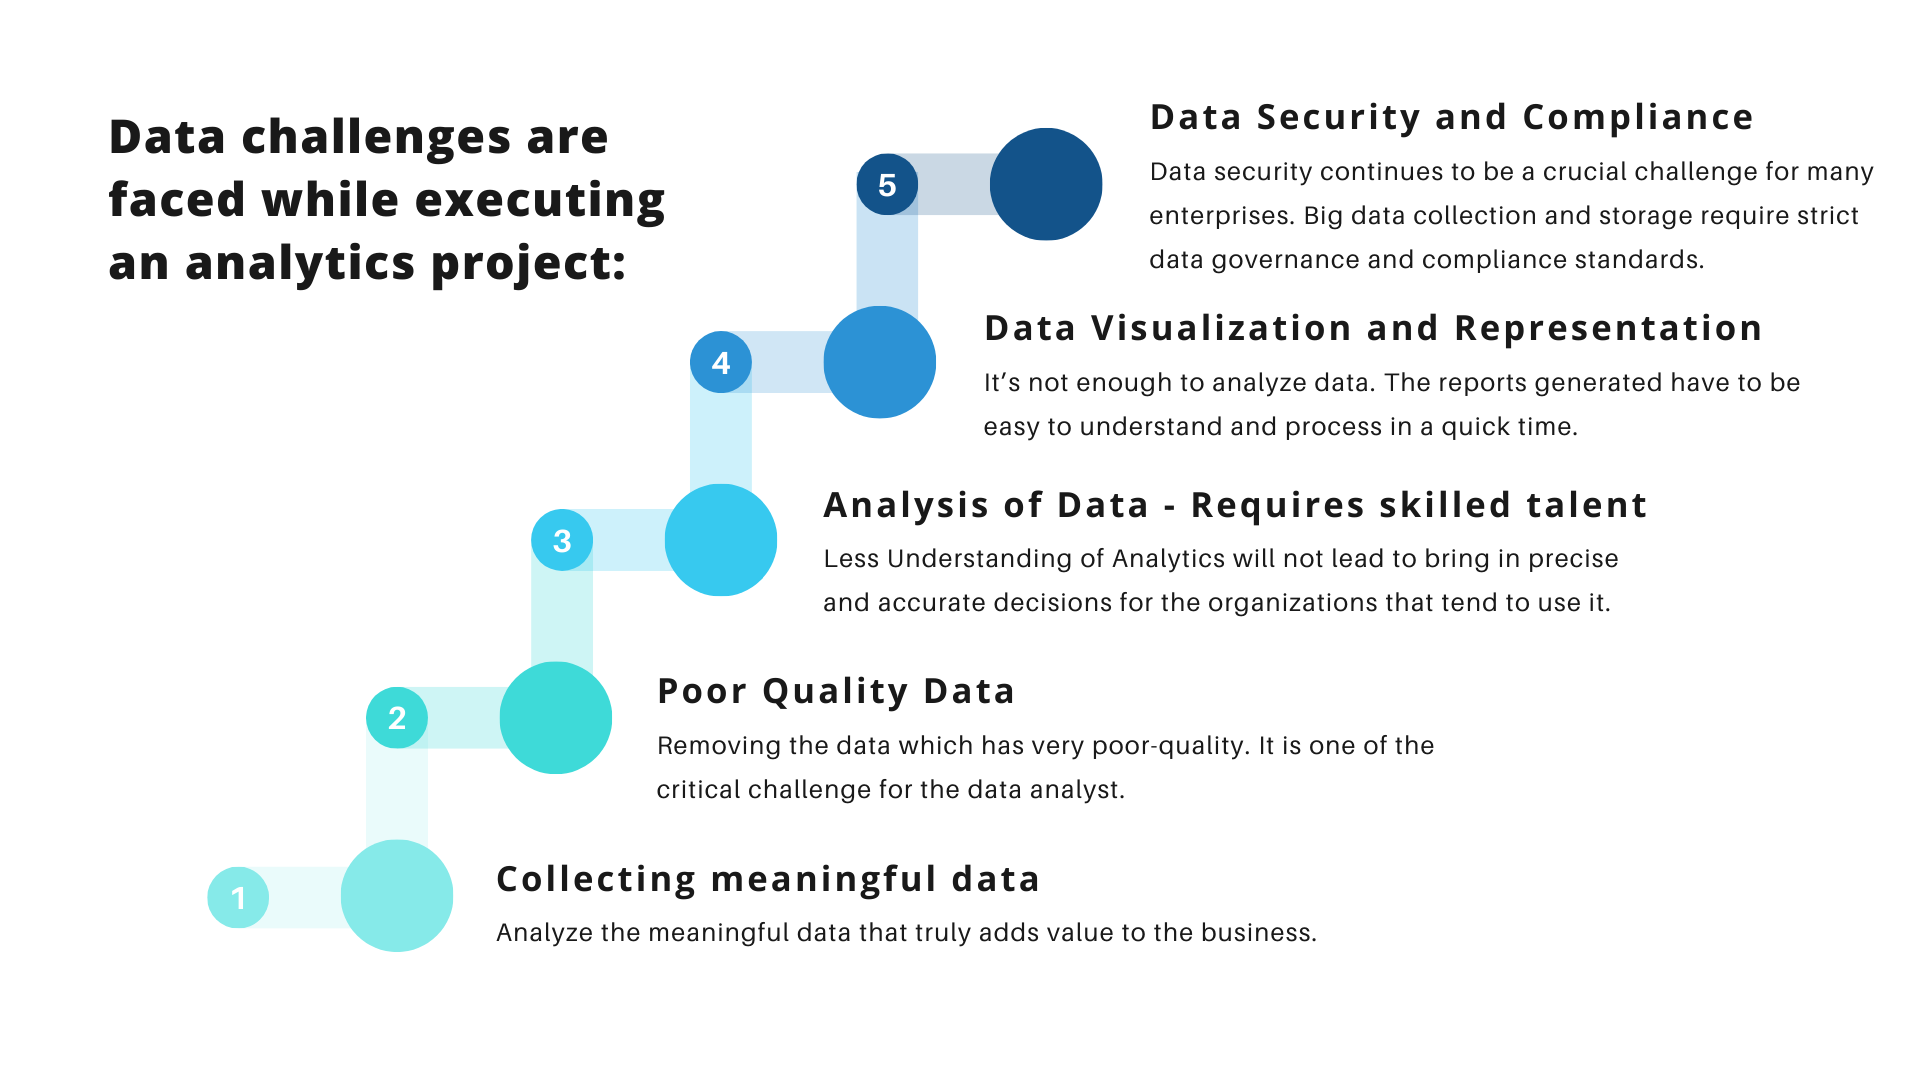

In [48]:
## Libraries:

# For importing dataset:
import pandas as pd

# For removing outliers:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Importing libraries for encoding: 
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

# For Data Scaling: making data points generalized so that the distance between them will be lower
from sklearn.preprocessing import StandardScaler

# For Logistic Regression Model:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# For Statistical Significance Variable - Slelect variable whose p value <= 0.05:
import statsmodels.api as sm
import warnings 
warnings.filterwarnings('ignore')

# For creating creating Progress Meters or Progress Bars: 
from tqdm import tqdm
tqdm.pandas()

# For Confusion matrix:
from sklearn.metrics import confusion_matrix

In [2]:
df =  pd.read_excel('C:/Users/DELL/Desktop/Disciplinary Electives/HR Analytics/Assignment 2 - Submission Date - 28.05.22/Renege.xlsx')
df

,Candidate Ref,DOJ Extended,Duration to accept offer,Notice period,Offered band,Pecent hike expected in CTC,Percent hike offered in CTC,Percent difference CTC,Joining Bonus,Candidate relocate actual,Gender,Candidate Source,Rex in Yrs,LOB,Location,Age,Status
0,2110407,Yes,14.0,30,E2,-20.79,13.16,42.86,No,No,Female,Agency,7,ERS,Noida,34,Joined
1,2112635,No,18.0,30,E2,50.00,320.00,180.00,No,No,Male,Employee Referral,8,INFRA,Chennai,34,Joined
2,2112838,No,3.0,45,E2,42.84,42.84,0.00,No,No,Male,Agency,4,INFRA,Noida,27,Joined
3,2115021,No,26.0,30,E2,42.84,42.84,0.00,No,No,Male,Employee Referral,4,INFRA,Noida,34,Joined
4,2115125,Yes,1.0,120,E2,42.59,42.59,0.00,No,Yes,Male,Employee Referral,6,INFRA,Noida,34,Joined
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12328,3828260,No,NaN,0,E0,47.54,42.86,-3.18,No,No,Male,Direct,0,BSERV,Chennai,34,Joined
12329,3830270,No,NaN,0,E0,47.54,42.86,-3.18,No,No,Male,Direct,0,BSERV,Chennai,34,Joined
12330,3834159,No,0.0,0,E2,35.42,35.42,0.00,No,No,Male,Direct,5,INFRA,Noida,34,Joined
12331,3835433,No,0.0,30,E1,76.92,53.85,-13.04,No,No,Male,Direct,4,INFRA,Noida,34,Joined


In [3]:
# No. of missing values in df.columns :
df.isnull().sum()

Candidate Ref                     0
DOJ Extended                      0
Duration to accept offer       2719
Notice period                     0
Offered band                      0
Pecent hike expected in CTC     747
Percent hike offered in CTC     596
Percent difference CTC          851
Joining Bonus                     0
Candidate relocate actual         0
Gender                            0
Candidate Source                  0
Rex in Yrs                        0
LOB                               0
Location                          0
Age                               0
Status                            0
dtype: int64

In [4]:
df.describe()

,Candidate Ref,Duration to accept offer,Notice period,Pecent hike expected in CTC,Percent hike offered in CTC,Percent difference CTC,Rex in Yrs,Age
count,1.233300e+04,9614.000000,12333.000000,11586.000000,11737.000000,11482.000000,12333.000000,12333.000000
mean,2.872888e+06,21.189619,37.943323,41.837663,37.772016,-2.078916,4.160788,30.232304
std,5.099726e+05,26.410351,24.526587,29.435844,35.593317,19.997159,2.810108,4.178853
min,2.109586e+06,-228.000000,0.000000,-68.830000,-60.530000,-68.950000,0.000000,19.000000
25%,2.378256e+06,2.000000,30.000000,25.000000,20.000000,-9.090000,3.000000,27.000000
50%,2.820675e+06,9.000000,30.000000,38.890000,34.480000,0.000000,4.000000,30.000000
75%,3.338197e+06,32.000000,60.000000,52.170000,47.060000,0.000000,6.000000,34.000000
max,3.836076e+06,224.000000,120.000000,359.770000,471.430000,300.000000,26.000000,64.000000


In [5]:
# Filling missing values:

df['Duration to accept offer'].fillna(df['Duration to accept offer'].median(), inplace = True)
df['Pecent hike expected in CTC'].fillna(df['Pecent hike expected in CTC'].median(), inplace = True)
df['Percent hike offered in CTC'].fillna(df['Percent hike offered in CTC'].median(), inplace = True)
df['Percent difference CTC'].fillna(df['Percent difference CTC'].median(), inplace = True)
df.isnull().sum()

Candidate Ref                  0
DOJ Extended                   0
Duration to accept offer       0
Notice period                  0
Offered band                   0
Pecent hike expected in CTC    0
Percent hike offered in CTC    0
Percent difference CTC         0
Joining Bonus                  0
Candidate relocate actual      0
Gender                         0
Candidate Source               0
Rex in Yrs                     0
LOB                            0
Location                       0
Age                            0
Status                         0
dtype: int64

In [6]:
df['Status'] = df['Status'].map({'Joined' : 1 , 'Not Joined' : 0})

#### Removing Outliers :

In [7]:
df.describe()

,Candidate Ref,Duration to accept offer,Notice period,Pecent hike expected in CTC,Percent hike offered in CTC,Percent difference CTC,Rex in Yrs,Age,Status
count,1.233300e+04,12333.000000,12333.000000,12333.000000,12333.000000,12333.000000,12333.000000,12333.000000,12333.000000
mean,2.872888e+06,18.502230,37.943323,41.659125,37.612927,-1.935467,4.160788,30.232304,0.707452
std,5.099726e+05,23.859093,24.526587,28.539057,34.729738,19.302044,2.810108,4.178853,0.454951
min,2.109586e+06,-228.000000,0.000000,-68.830000,-60.530000,-68.950000,0.000000,19.000000,0.000000
25%,2.378256e+06,4.000000,30.000000,26.320000,20.060000,-8.330000,3.000000,27.000000,0.000000
50%,2.820675e+06,9.000000,30.000000,38.890000,34.480000,0.000000,4.000000,30.000000,1.000000
75%,3.338197e+06,25.000000,60.000000,50.000000,45.830000,0.000000,6.000000,34.000000,1.000000
max,3.836076e+06,224.000000,120.000000,359.770000,471.430000,300.000000,26.000000,64.000000,1.000000


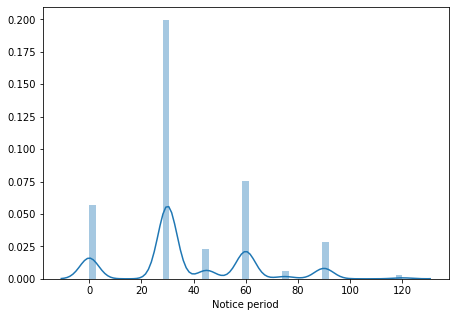

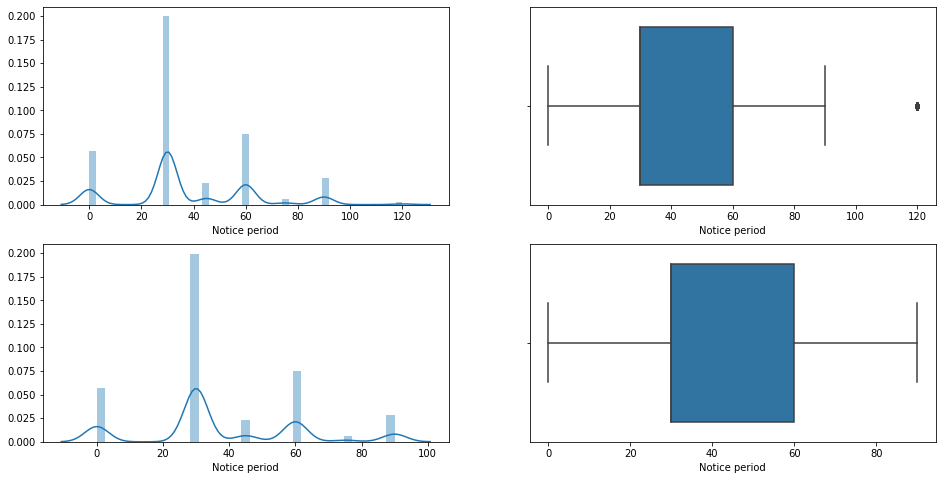

In [8]:
# For Notice Period:

plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(df['Notice period'])
percentile25 = df['Notice period'].quantile(0.25)
percentile75 = df['Notice period'].quantile(0.75)
q75, q25 = np.percentile(df['Notice period'], [75 ,25])
iqr = q75 - q25
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr
df[df['Notice period'] > upper_limit]
df[df['Notice period'] < lower_limit]
df1 = df[df['Notice period'] < upper_limit]
df1.shape
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(df['Notice period'])
plt.subplot(2,2,2)
sns.boxplot(df['Notice period'])
plt.subplot(2,2,3)
sns.distplot(df1['Notice period'])
plt.subplot(2,2,4)
sns.boxplot(df1['Notice period'])
plt.show()

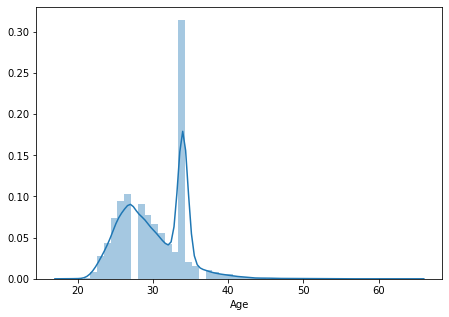

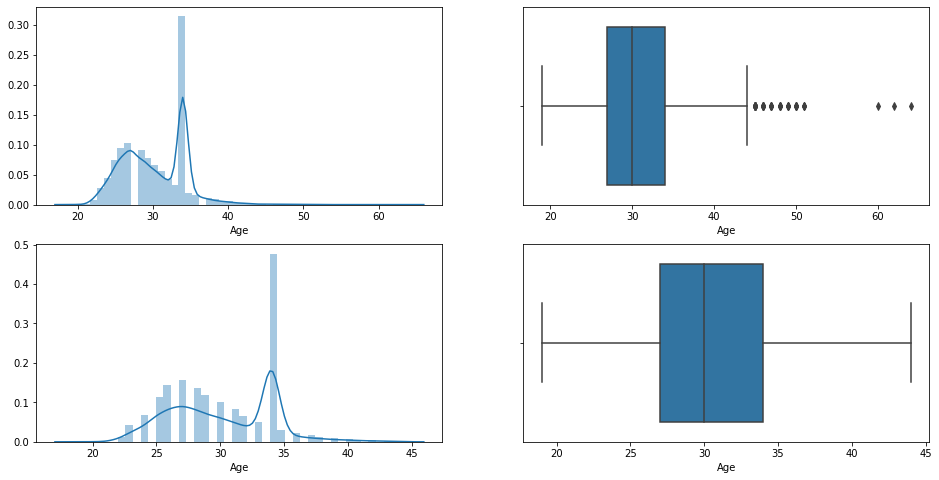

In [9]:
# For Age:

plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(df1['Age'])
percentile25 = df1['Age'].quantile(0.25)
percentile75 = df1['Age'].quantile(0.75)
q75, q25 = np.percentile(df1['Age'], [75 ,25])
iqr = q75 - q25
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr
df1[df1['Age'] > upper_limit]
df1[df1['Age'] < lower_limit]
df2 = df1[df1['Age'] < upper_limit]
df2.shape
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(df1['Age'])
plt.subplot(2,2,2)
sns.boxplot(df1['Age'])
plt.subplot(2,2,3)
sns.distplot(df2['Age'])
plt.subplot(2,2,4)
sns.boxplot(df2['Age'])
plt.show()

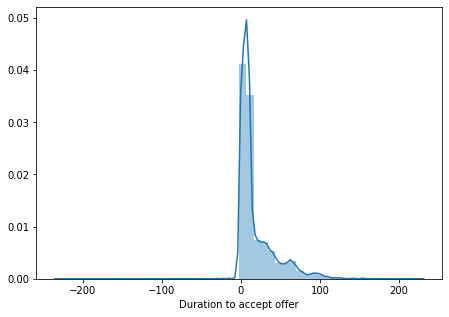

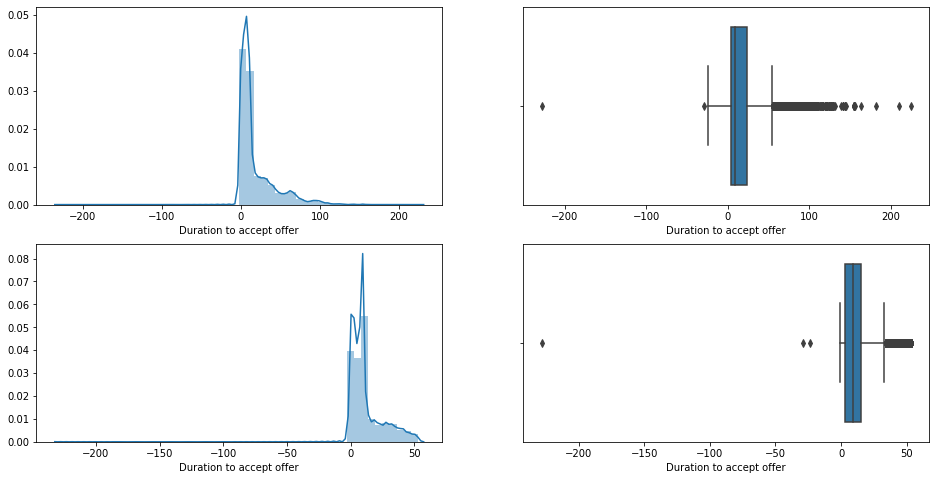

In [10]:
# For relevant experience:

plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(df2['Duration to accept offer'])   # distplot - data distribution of a variable against the density distribution.
percentile25 = df2['Duration to accept offer'].quantile(0.25)
percentile75 = df2['Duration to accept offer'].quantile(0.75)
q75, q25 = np.percentile(df2['Duration to accept offer'], [75 ,25])
iqr = q75 - q25
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr
df2[df2['Duration to accept offer'] > upper_limit]
df2[df2['Duration to accept offer'] < lower_limit]
df3 = df2[df2['Duration to accept offer'] < upper_limit]
df3.shape
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(df2['Duration to accept offer'])
plt.subplot(2,2,2)
sns.boxplot(df2['Duration to accept offer'])
plt.subplot(2,2,3)
sns.distplot(df3['Duration to accept offer'])
plt.subplot(2,2,4)
sns.boxplot(df3['Duration to accept offer'])
plt.show()

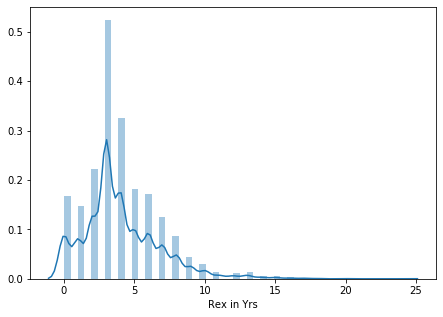

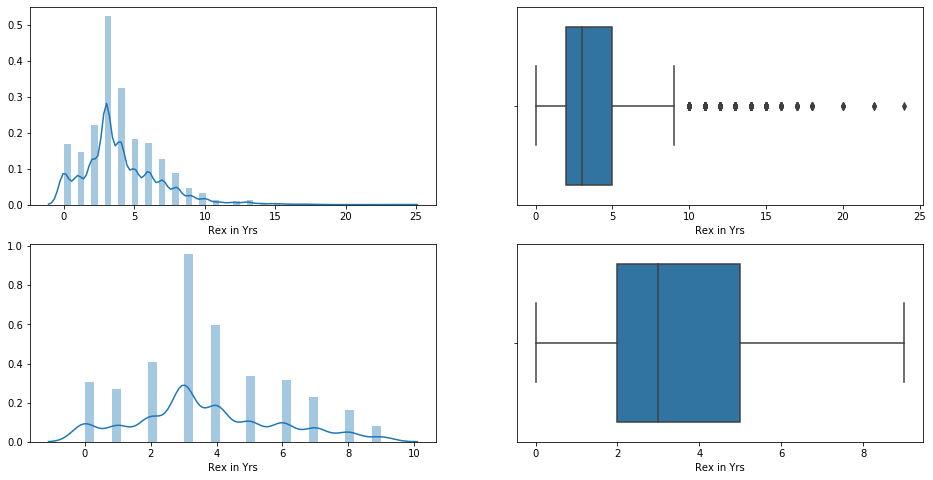

In [11]:
# For relevant experience:

plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(df3['Rex in Yrs'])
percentile25 = df3['Rex in Yrs'].quantile(0.25)
percentile75 = df3['Rex in Yrs'].quantile(0.75)
q75, q25 = np.percentile(df3['Rex in Yrs'], [75 ,25])
iqr = q75 - q25
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr
df3[df3['Rex in Yrs'] > upper_limit]
df3[df3['Rex in Yrs'] < lower_limit]
df4 = df3[df3['Rex in Yrs'] < upper_limit]
df4.shape
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(df3['Rex in Yrs'])
plt.subplot(2,2,2)
sns.boxplot(df3['Rex in Yrs'])
plt.subplot(2,2,3)
sns.distplot(df4['Rex in Yrs'])
plt.subplot(2,2,4)
sns.boxplot(df4['Rex in Yrs'])
plt.show()

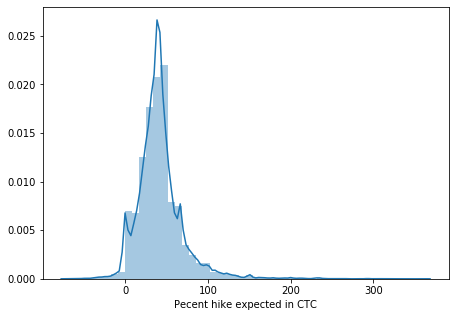

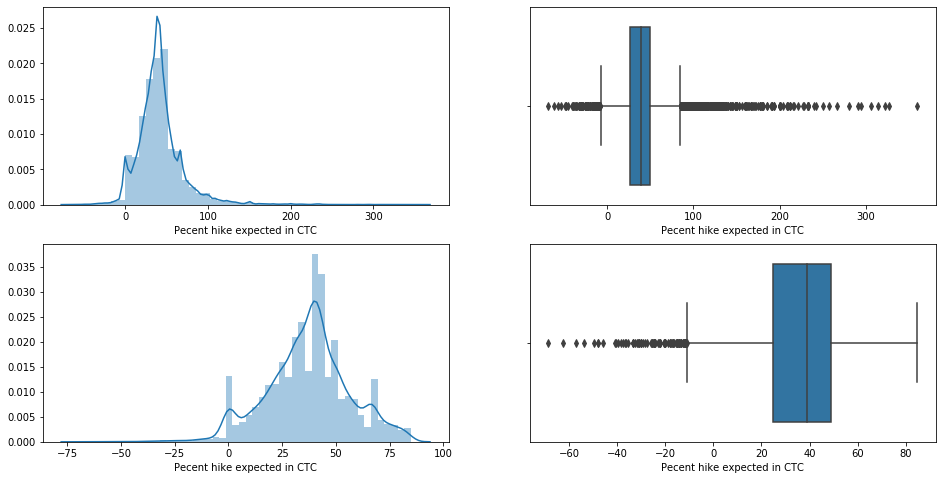

In [12]:
# For Hike Expected:

plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(df4['Pecent hike expected in CTC'])
percentile25 = df4['Pecent hike expected in CTC'].quantile(0.25)
percentile75 = df4['Pecent hike expected in CTC'].quantile(0.75)
q75, q25 = np.percentile(df4['Pecent hike expected in CTC'], [75 ,25])
iqr = q75 - q25
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr
df4[df4['Pecent hike expected in CTC'] > upper_limit]
df4[df4['Pecent hike expected in CTC'] < lower_limit]
df5 = df4[df4['Pecent hike expected in CTC'] < upper_limit]
df5.shape
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(df4['Pecent hike expected in CTC'])
plt.subplot(2,2,2)
sns.boxplot(df4['Pecent hike expected in CTC'])
plt.subplot(2,2,3)
sns.distplot(df5['Pecent hike expected in CTC'])
plt.subplot(2,2,4)
sns.boxplot(df5['Pecent hike expected in CTC'])
plt.show()

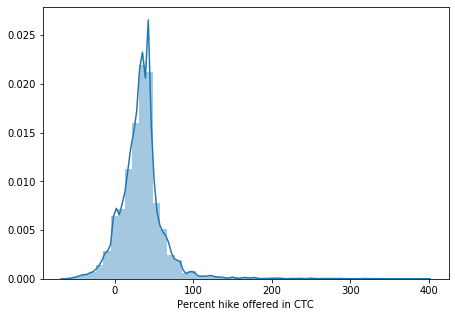

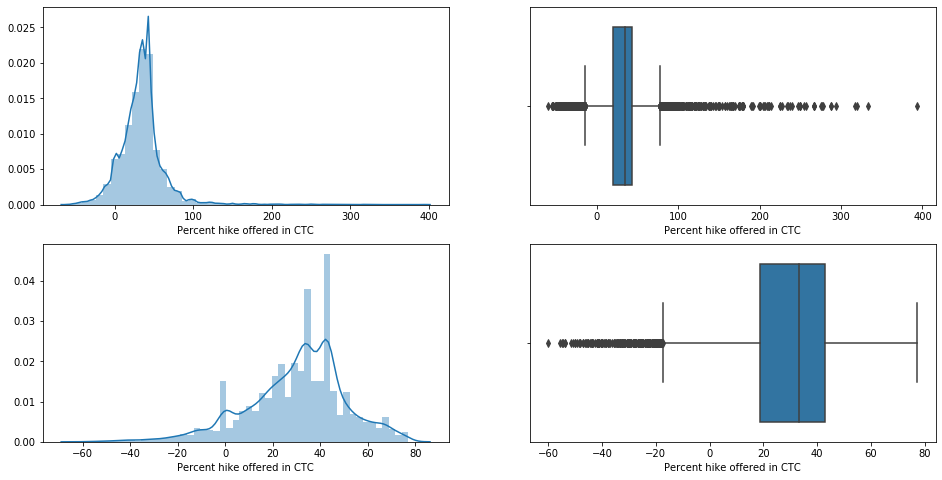

In [13]:
# For Hike Offered:

plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(df5['Percent hike offered in CTC'])
percentile25 = df5['Percent hike offered in CTC'].quantile(0.25)
percentile75 = df5['Percent hike offered in CTC'].quantile(0.75)
q75, q25 = np.percentile(df5['Percent hike offered in CTC'], [75 ,25])
iqr = q75 - q25
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr
df5[df5['Percent hike offered in CTC'] > upper_limit]
df5[df5['Percent hike offered in CTC'] < lower_limit]
df6 = df5[df5['Percent hike offered in CTC'] < upper_limit]
df6.shape
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(df5['Percent hike offered in CTC'])
plt.subplot(2,2,2)
sns.boxplot(df5['Percent hike offered in CTC'])
plt.subplot(2,2,3)
sns.distplot(df6['Percent hike offered in CTC'])
plt.subplot(2,2,4)
sns.boxplot(df6['Percent hike offered in CTC'])
plt.show()

###### 'Percent difference CTC' not considered because it has linear dependency with 'Pecent hike expected in CTC' & 'Percent hike offered in CTC'
###### 'Candidate Ref' not considered because it has linear dependency with 'Pecent hike expected in CTC' & 'Percent hike offered in CTC'

In [14]:
df6.shape

(9464, 17)

In [15]:
df6.columns

Index(['Candidate Ref', 'DOJ Extended', 'Duration to accept offer',
       'Notice period', 'Offered band', 'Pecent hike expected in CTC',
       'Percent hike offered in CTC', 'Percent difference CTC',
       'Joining Bonus', 'Candidate relocate actual', 'Gender',
       'Candidate Source', 'Rex in Yrs', 'LOB', 'Location', 'Age', 'Status'],
      dtype='object')

In [16]:
# New dataframe without 'Candidate Ref' & 'Percent difference CTC'
df7 = df6[['DOJ Extended', 'Duration to accept offer',
       'Notice period', 'Offered band', 'Pecent hike expected in CTC',
       'Percent hike offered in CTC', 'Joining Bonus', 'Candidate relocate actual', 'Gender',
       'Candidate Source', 'Rex in Yrs', 'LOB', 'Location', 'Age', 'Status']]

#### Label encoding:

In [17]:
encoder = LabelEncoder()
df7.head()

,DOJ Extended,Duration to accept offer,Notice period,Offered band,Pecent hike expected in CTC,Percent hike offered in CTC,Joining Bonus,Candidate relocate actual,Gender,Candidate Source,Rex in Yrs,LOB,Location,Age,Status
0,Yes,14.0,30,E2,-20.79,13.16,No,No,Female,Agency,7,ERS,Noida,34,1
2,No,3.0,45,E2,42.84,42.84,No,No,Male,Agency,4,INFRA,Noida,27,1
3,No,26.0,30,E2,42.84,42.84,No,No,Male,Employee Referral,4,INFRA,Noida,34,1
5,Yes,17.0,30,E1,42.83,42.83,No,No,Male,Employee Referral,2,INFRA,Noida,34,1
6,Yes,37.0,30,E2,31.58,31.58,No,No,Male,Employee Referral,7,INFRA,Noida,32,1


In [18]:
# Label Encoding:
df7['DOJ Extended'] = encoder.fit_transform(df7['DOJ Extended'])
df7['Offered band'] = encoder.fit_transform(df7['Offered band'])
df7['Joining Bonus'] = encoder.fit_transform(df7['Joining Bonus'])
df7['Candidate relocate actual'] = encoder.fit_transform(df7['Candidate relocate actual'])
df7['Gender'] = encoder.fit_transform(df7['Gender'])
df7['Candidate Source'] = encoder.fit_transform(df7['Candidate Source'])
df7['LOB'] = encoder.fit_transform(df7['LOB'])
df7['Location'] = encoder.fit_transform(df7['Location'])

In [19]:
df7.head()

,DOJ Extended,Duration to accept offer,Notice period,Offered band,Pecent hike expected in CTC,Percent hike offered in CTC,Joining Bonus,Candidate relocate actual,Gender,Candidate Source,Rex in Yrs,LOB,Location,Age,Status
0,1,14.0,30,2,-20.79,13.16,0,0,0,0,7,6,9,34,1
2,0,3.0,45,2,42.84,42.84,0,0,1,0,4,9,9,27,1
3,0,26.0,30,2,42.84,42.84,0,0,1,2,4,9,9,34,1
5,1,17.0,30,1,42.83,42.83,0,0,1,2,2,9,9,34,1
6,1,37.0,30,2,31.58,31.58,0,0,1,2,7,9,9,32,1


In [20]:
X = df7.drop(columns=['Status','Gender','LOB'], axis=1)
Y = df7['Status']

In [21]:
# Data Scaling: making data points generalized so that the distance between them will be lower
scaled_features = StandardScaler().fit_transform(X.values)
scaled_features_df = pd.DataFrame(scaled_features, index=X.index, columns=X.columns)

In [22]:
scaled_features_df

,DOJ Extended,Duration to accept offer,Notice period,Offered band,Pecent hike expected in CTC,Percent hike offered in CTC,Joining Bonus,Candidate relocate actual,Candidate Source,Rex in Yrs,Location,Age
0,1.300063,0.166513,-0.221453,1.061726,-3.026039,-0.821508,-0.205926,-0.386317,-1.426890,1.455666,1.247987,1.022287
2,-0.769193,-0.698922,0.427010,1.061726,0.348918,0.618177,-0.205926,-0.386317,-1.426890,0.117803,1.247987,-0.774309
3,-0.769193,1.110623,-0.221453,1.061726,0.348918,0.618177,-0.205926,-0.386317,1.693999,0.117803,1.247987,1.022287
5,1.300063,0.402541,-0.221453,-0.353909,0.348387,0.617692,-0.205926,-0.386317,1.693999,-0.774106,1.247987,1.022287
6,1.300063,1.976058,-0.221453,1.061726,-0.248317,0.071989,-0.205926,-0.386317,1.693999,1.455666,1.247987,0.508974
...,...,...,...,...,...,...,...,...,...,...,...,...
12328,-0.769193,-0.226867,-1.518381,-1.769544,0.598207,0.619147,-0.205926,-0.386317,0.133555,-1.666015,-0.739815,1.022287
12329,-0.769193,-0.226867,-1.518381,-1.769544,0.598207,0.619147,-0.205926,-0.386317,0.133555,-1.666015,-0.739815,1.022287
12330,-0.769193,-0.934949,-1.518381,1.061726,-0.044642,0.258256,-0.205926,-0.386317,0.133555,0.563757,1.247987,1.022287
12331,-0.769193,-0.934949,-0.221453,-0.353909,2.156533,1.152239,-0.205926,-0.386317,0.133555,0.117803,1.247987,1.022287


#### Q.2 - *Develope Logistic Regression Model & variables having statistical significance on renege :*

#### Splitting the data into Training data & Testing Data

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(scaled_features_df, Y, test_size=0.2, random_state=2)

In [24]:
X_train.shape

(7571, 12)

In [25]:
X_test.shape

(1893, 12)

#### --- Logistic Regression Model

In [26]:
model = LogisticRegression()
model.fit(X_train,Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [27]:
model.score(X_test,Y_test)

0.7522451135763338

##### Variables having statistical significance on renege:
- Selected variable whose p-value <= 0.05

In [28]:
logit_model=sm.Logit(Y,scaled_features_df)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.603356
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                 Status   No. Observations:                 9464
Model:                          Logit   Df Residuals:                     9452
Method:                           MLE   Df Model:                           11
Date:                Sun, 29 May 2022   Pseudo R-squ.:                0.006666
Time:                        20:11:27   Log-Likelihood:                -5710.2
converged:                       True   LL-Null:                       -5748.5
Covariance Type:            nonrobust   LLR p-value:                 6.565e-12
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
DOJ Extended                    0.2514      0.024     10.608      0.000   

#### Q.3 - *Probability of acceptance of an offer and finally joining the company after offer acceptance:*


In [29]:
y_pred_prob = model.predict_proba(X_test)
y_pred_prob = y_pred_prob[:,1]

In [30]:
y_pred_prob

array([0.70053586, 0.74989979, 0.82223135, ..., 0.69307996, 0.77396908,
       0.51777288])

In [31]:
# X_test['Prob'] = y_pred_prob
# X_test

#### Q.4 - *How would you interpret sensitivity, specificity and model accurancy? How it is determined?:*

In [32]:
y_pred = model.predict(X_test)
y_pred

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [33]:
y_pred

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [34]:
confusion_matrix(Y_test, y_pred)

array([[ 227,  363],
       [ 106, 1197]], dtype=int64)

In [35]:
# sensitivity, specificity and accuracy 

## Sensitivity : It is a measure of how well a machine learning model can detect positive instances.
## Specificity : It is the proportion of true negatives that are correctly predicted by the model.
## Accuracy : Determine which model is best at identifying relationships and patterns b/w variables based on input data.

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

cm = confusion_matrix(Y_test, y_pred)
total=sum(sum(cm))
Accuracy = (cm[0,0]+cm[1,1])/total
Specificity = cm[0,0]/(cm[0,0]+cm[0,1])   # 
Sensitivity = cm[1,1]/(cm[1,0]+cm[1,1])

print('Accuracy', Accuracy)
print('Specificity', Specificity)
print('Sensitivity', Sensitivity)

Accuracy 0.7522451135763338
Specificity 0.3847457627118644
Sensitivity 0.9186492709132771


#### Q.5 - *Cut off probability to classify joining & not-joining the firm after accepting the offer:*

In [36]:
cutoff_df = []
for i in tqdm(np.arange(0,1,0.001)):
    
    y_pred1 = (y_pred_prob>i)*1
    cm = confusion_matrix(Y_test, y_pred1)
    total=sum(sum(cm))
    Accuracy = (cm[0,0]+cm[1,1])/total
    Specificity = cm[0,0]/(cm[0,0]+cm[0,1]) 
    Sensitivity = cm[1,1]/(cm[1,0]+cm[1,1])
    cutoff_df.append([ i ,Accuracy,Sensitivity,Specificity])
    
cutoff_df = pd.DataFrame(cutoff_df, columns = ['Probability','Accuracy','Sensitivity','Specificity'])
cutoff_df

100%|██████████| 1000/1000 [00:03<00:00, 255.74it/s]


,Probability,Accuracy,Sensitivity,Specificity
0,0.000,0.688325,1.000000,0.0
1,0.001,0.688325,1.000000,0.0
2,0.002,0.688325,1.000000,0.0
3,0.003,0.688325,1.000000,0.0
4,0.004,0.688325,1.000000,0.0
...,...,...,...,...
995,0.995,0.431590,0.174213,1.0
996,0.996,0.431062,0.173446,1.0
997,0.997,0.428420,0.169609,1.0
998,0.998,0.424723,0.164236,1.0


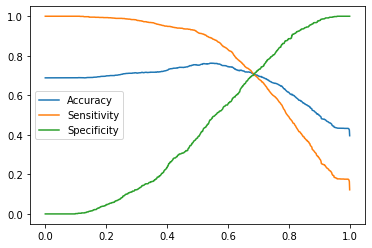

In [37]:
plt.figure(figsize = (6,4))

plt.plot(cutoff_df['Probability'], cutoff_df['Accuracy'], label = 'Accuracy')
plt.plot(cutoff_df['Probability'], cutoff_df['Sensitivity'], label = 'Sensitivity')
plt.plot(cutoff_df['Probability'], cutoff_df['Specificity'], label = 'Specificity')
plt.legend()
plt.show()

In [38]:
cutoff_df[round(cutoff_df['Sensitivity'],2)==round(cutoff_df['Specificity'],2)]

,Probability,Accuracy,Sensitivity,Specificity
685,0.685,0.706286,0.705295,0.708475


##### The plot between sensitivity, specificity, and accuracy shows their variation with various values of cut-off. Also can be seen from the plot the sensitivity and specificity are inversely proportional. The point where the sensitivity and specificity curves cross each other gives the optimum cut-off value. This value is 0.685 for the above plot. Let us calculate the value of Sensitivity, Specificity, and accuracy at the optimum point.

#### Selecting cutoff as 0.68 for our case

In [39]:
y_pred1 = (y_pred_prob>0.68)*1
cm1 = confusion_matrix(Y_test, y_pred1)
total1=sum(sum(cm1))
Accuracy = (cm1[0,0]+cm1[1,1])/total1
Specificity = cm1[0,0]/(cm1[0,0]+cm1[0,1])
Sensitivity = cm1[1,1]/(cm1[1,0]+cm1[1,1])
print(cm1)
print('Accuracy', Accuracy)
print('Specificity', Specificity)
print('Sensitivity', Sensitivity)

[[413 177]
 [372 931]]
Accuracy 0.7099841521394612
Specificity 0.7
Sensitivity 0.7145049884881044


#### Q.6 - *How should we use Cook's distance and standarized residual in Logistic Regression?*

#### Cook's distance identify influential data points. Influential data points have a big impact on estimates relative to other data points. It can be usefule to check whether the conclusions of an analysis still hold if the influential data points are excluded. However, influential data points are also those that contribute most information - so removing them without good reason reduces statistical power - espeially in small samples where it is somewhat likely some data points will have a high Cook's distance.

In [40]:
df7.head()

,DOJ Extended,Duration to accept offer,Notice period,Offered band,Pecent hike expected in CTC,Percent hike offered in CTC,Joining Bonus,Candidate relocate actual,Gender,Candidate Source,Rex in Yrs,LOB,Location,Age,Status
0,1,14.0,30,2,-20.79,13.16,0,0,0,0,7,6,9,34,1
2,0,3.0,45,2,42.84,42.84,0,0,1,0,4,9,9,27,1
3,0,26.0,30,2,42.84,42.84,0,0,1,2,4,9,9,34,1
5,1,17.0,30,1,42.83,42.83,0,0,1,2,2,9,9,34,1
6,1,37.0,30,2,31.58,31.58,0,0,1,2,7,9,9,32,1


In [41]:
df7.columns

Index(['DOJ Extended', 'Duration to accept offer', 'Notice period',
       'Offered band', 'Pecent hike expected in CTC',
       'Percent hike offered in CTC', 'Joining Bonus',
       'Candidate relocate actual', 'Gender', 'Candidate Source', 'Rex in Yrs',
       'LOB', 'Location', 'Age', 'Status'],
      dtype='object')

In [42]:
df7.rename(columns = {'DOJ Extended' : 'A', 
                      'Duration to accept offer' : 'B', 
                      'Notice period' : 'C', 
                      'Offered band' : 'D',
                      'Pecent hike expected in CTC' : 'E', 
                      'Percent hike offered in CTC' : 'F', 
                      'Joining Bonus' : 'G', 
                      'Candidate relocate actual' : 'H',
                      'Gender' : 'I',
                      'Candidate Source' : 'J', 
                      'Rex in Yrs' : 'K', 
                      'LOB' : 'L', 
                      'Location' : 'M',
                      'Age' : 'N', 
                      'Status' : 'O'}, inplace = True)

In [43]:
df7

,A,B,C,D,E,F,G,H,I,J,K,L,M,N,O
0,1,14.0,30,2,-20.79,13.16,0,0,0,0,7,6,9,34,1
2,0,3.0,45,2,42.84,42.84,0,0,1,0,4,9,9,27,1
3,0,26.0,30,2,42.84,42.84,0,0,1,2,4,9,9,34,1
5,1,17.0,30,1,42.83,42.83,0,0,1,2,2,9,9,34,1
6,1,37.0,30,2,31.58,31.58,0,0,1,2,7,9,9,32,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12328,0,9.0,0,0,47.54,42.86,0,0,1,1,0,2,2,34,1
12329,0,9.0,0,0,47.54,42.86,0,0,1,1,0,2,2,34,1
12330,0,0.0,0,2,35.42,35.42,0,0,1,1,5,9,9,34,1
12331,0,0.0,30,1,76.92,53.85,0,0,1,1,4,9,9,34,1


In [44]:
import statsmodels.formula.api as smf

In [45]:
model =smf.ols(formula=' E ~ B + C + D + F + J + K + L + M + N', data= df7 )
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      E   R-squared:                       0.410
Model:                            OLS   Adj. R-squared:                  0.410
Method:                 Least Squares   F-statistic:                     731.2
Date:                Sun, 29 May 2022   Prob (F-statistic):               0.00
Time:                        20:11:32   Log-Likelihood:                -38722.
No. Observations:                9464   AIC:                         7.746e+04
Df Residuals:                    9454   BIC:                         7.754e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     25.8685      1.405     18.418      0.0

In [46]:
# model =smf.ols(formula=' O ~ B + C + D + E + F + J + K + L + M + N', data= df7 )
# results = model.fit()
# print(results.summary())

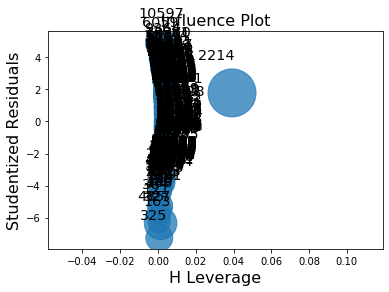

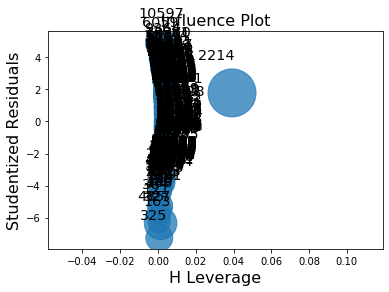

In [47]:
sm.graphics.influence_plot(results, criterion="cooks")